# Module 03

## Session 09 Unsupervised Learning

# DBScan

Analyze data "ilustrasi k means.csv"
* plot the data using scatter plot, and make initial clustering
* determine the optimal hyperparameter
    - minimum sample per cluster
    - epsilon
* plot the data and clustering result (optimal hyperparameter) using scatter plot

# Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Data

In [4]:
X = pd.read_csv('./datasets/ilustrasi k means.csv', sep=';')
X.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


# EDA

Text(0, 0.5, 'Tinggi Badan Istri')

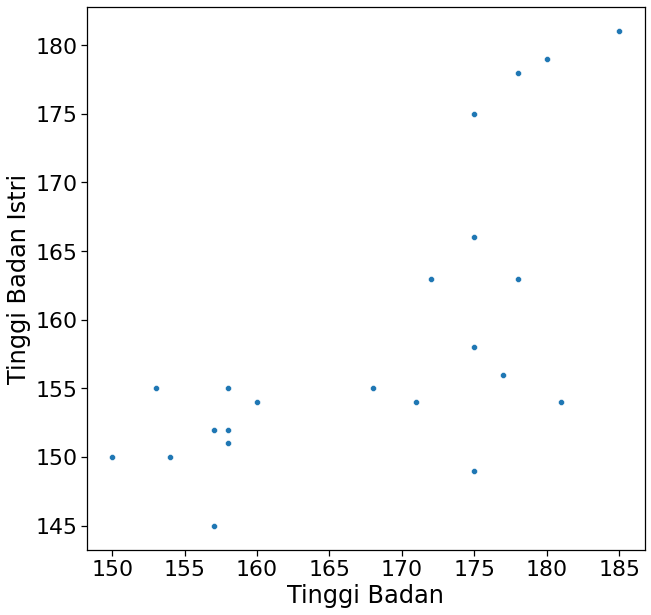

In [5]:
plt.figure(figsize=(10,10))

sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri', 
    data=X,
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# Initial Clustering

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
label = dbscan.fit_predict(X_scaled)

In [8]:
label

array([-1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  1])

In [9]:
silhouette_score(X_scaled, label)

0.6161772649616484

# Optimizing eps & min_samples

In [14]:
for eps in [0.6, 0.65, 0.7]:
    for min_samples in [3,4,5,6]:
        # eps & min_samples
        print('epsilon', eps)
        print('min_samples', min_samples)

        # silhouette score
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        label = dbscan.fit_predict(X_scaled)
        print('score', silhouette_score(X_scaled, label))

        # cluster
        print('cluster', np.unique(label))
        print('frequency', np.bincount(label+1))

        print('\n')


epsilon 0.6
min_samples 3
score 0.461857292361063
cluster [-1  0  1  2]
frequency [1 4 8 9]


epsilon 0.6
min_samples 4
score 0.3901682187136735
cluster [-1  0  1]
frequency [7 6 9]


epsilon 0.6
min_samples 5
score 0.3549711321389997
cluster [-1  0  1]
frequency [8 5 9]


epsilon 0.6
min_samples 6
score 0.5300936637683802
cluster [-1  0]
frequency [13  9]


epsilon 0.65
min_samples 3
score 0.6161772649616484
cluster [0 1 2]
frequency [0 4 9 9]


epsilon 0.65
min_samples 4
score 0.6161772649616484
cluster [0 1 2]
frequency [0 4 9 9]


epsilon 0.65
min_samples 5
score 0.4839777372002889
cluster [-1  0  1]
frequency [6 7 9]


epsilon 0.65
min_samples 6
score 0.5300936637683802
cluster [-1  0]
frequency [13  9]


epsilon 0.7
min_samples 3
score 0.6161772649616484
cluster [0 1 2]
frequency [0 4 9 9]


epsilon 0.7
min_samples 4
score 0.6161772649616484
cluster [0 1 2]
frequency [0 4 9 9]


epsilon 0.7
min_samples 5
score 0.6161772649616484
cluster [-1  0  1]
frequency [4 9 9]


epsilon 0.7


# Final Clustering

In [15]:
dbscan = DBSCAN(eps=0.7, min_samples=4)
label = dbscan.fit_predict(X_scaled)

In [16]:
label

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X['cluster'] = label
X.head()

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,1
3,180,179,0
4,185,181,0


# Visualization

Text(0, 0.5, 'Tinggi Badan Istri')

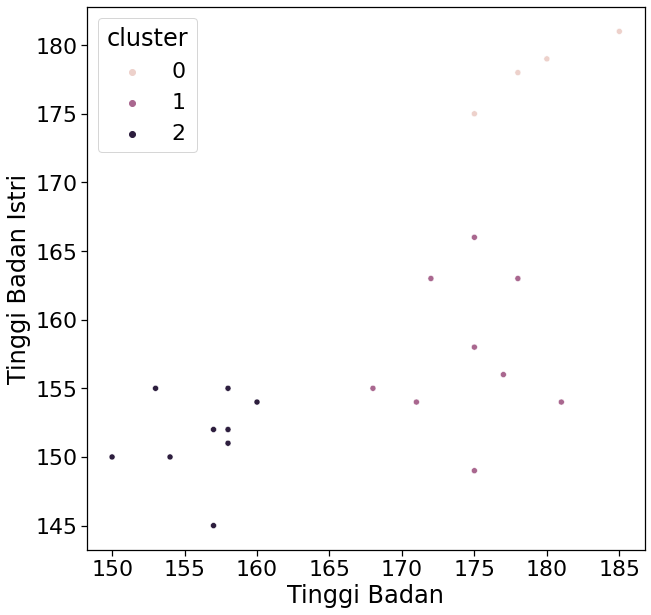

In [18]:
plt.figure(figsize=(10,10))

sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri', 
    data=X,
    hue='cluster'
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')